In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading

In [3]:
data = pd.read_csv('/kaggle/input/titanic/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.drop(['PassengerId','Name','Ticket'], axis =1 , inplace = True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


# EDA 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [6]:
data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

<Axes: ylabel='Frequency'>

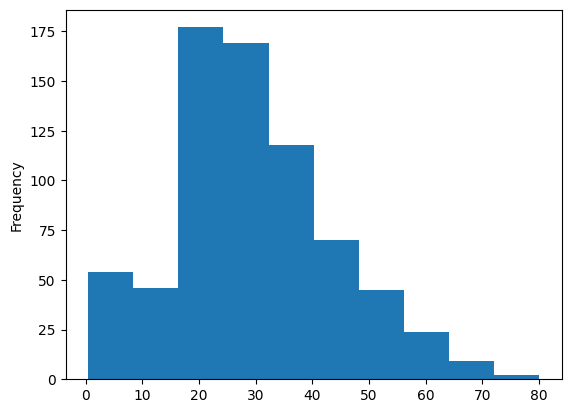

In [7]:
data['Age'].plot(kind='hist')

We can see the distribution of age. Its much better in kdeplot

# Exploring Age

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Density'>

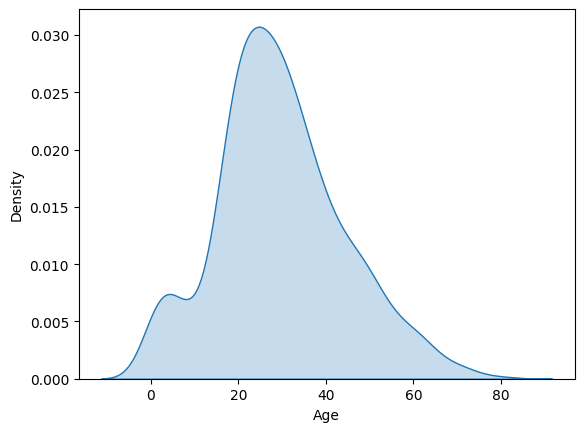

In [8]:
sns.kdeplot(data['Age'], fill = True)

Lets analyze the ages of survivors and non- survivors.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Density'>

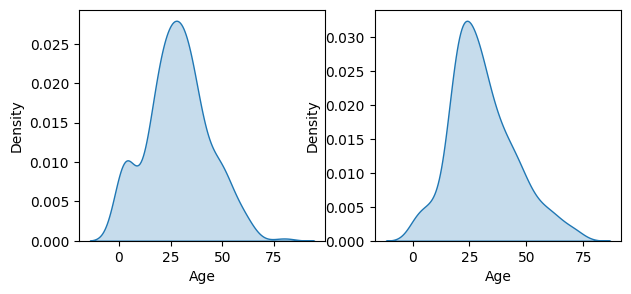

In [9]:
alive = data[data['Survived'] == True]
dead = data[data['Survived'] == False]

plt.figure(figsize = (7,3))
plt.subplot(1,2,1)
sns.kdeplot(alive['Age'], fill = True)
plt.subplot(1,2,2)
sns.kdeplot(dead['Age'], fill = True)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='Age', ylabel='Density'>

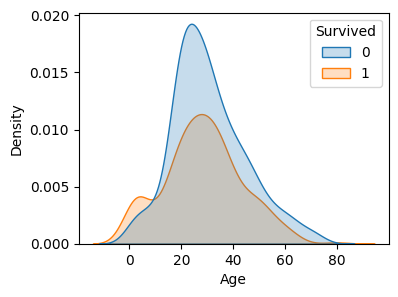

In [10]:
# Lets compare them on same scale
plt.figure(figsize = (4,3))
sns.kdeplot(x='Age', hue ='Survived', data= data, fill = True)

We can see easily that, most of adults gave way to children and elderly.

In [11]:
data['Age'].value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

So the data in continous clearly.

In [12]:
# Lets handle the NaN values as well

mean = data['Age'].mean()

data['Age'].fillna(mean,inplace =True)

data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

# Explore Cabin

In [13]:
cabin = data['Cabin']
cabin.value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [14]:
# Lets extract 2 things : No of cabins owned. The cabin name(deck). Both can indicate the status of person.

cabin_count = []
cabin_deck = []

for row in cabin:
    if pd.isna(row):
        cabin_count.append(np.nan)
        cabin_deck.append(np.nan)
    else:
        cabin_names = row.split()
        cabin_count.append(len(cabin_names))
        cabin_deck.append(cabin_names[0][0])
        
cabin_count = pd.Series(cabin_count)
cabin_deck = pd.Series(cabin_deck)

In [15]:
cabin_count.isna().sum(), cabin_deck.isna().sum()

(687, 687)

<Axes: >

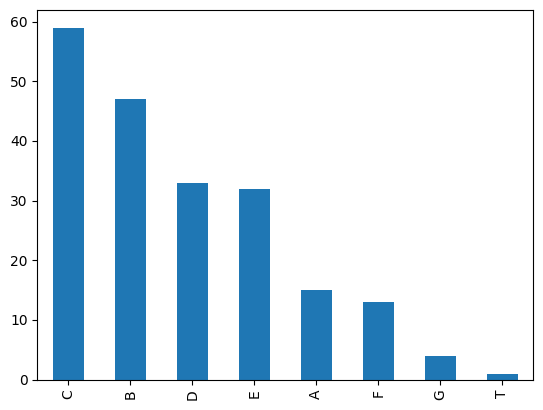

In [16]:
cabin_deck.value_counts().plot(kind='bar')

In [17]:
cabin_count.value_counts()

1.0    180
2.0     16
3.0      6
4.0      2
Name: count, dtype: int64

In [18]:
cor = cabin_count.corr(data['Survived'])
cor

-0.03421769287674746

<Axes: >

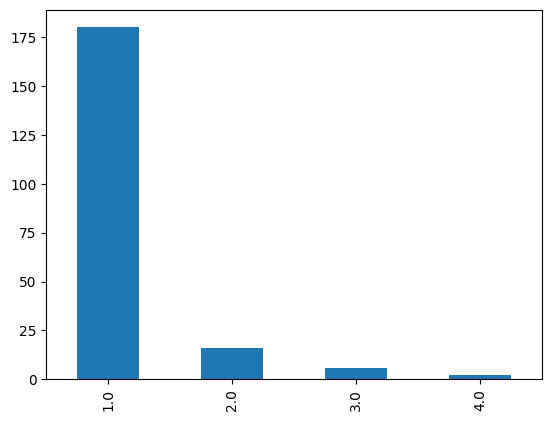

In [19]:
cabin_count.value_counts().plot(kind='bar')

In [20]:
cabin_deck.value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: count, dtype: int64

In [21]:
# Lets handle T

cabin_deck = cabin_deck.replace('T','C')
cabin_deck.value_counts()

C    60
B    47
D    33
E    32
A    15
F    13
G     4
Name: count, dtype: int64

Lets handle Null Values

In [22]:
mode = cabin_count.mode().iloc[0] # Note that cabin_count is still not continous
cabin_count.fillna(mode, inplace =True)
cabin_count.isna().sum()

0

In [23]:
mode= cabin_deck.mode().iloc[0]
cabin_deck.fillna(mode, inplace =True)
cabin_deck.isna().sum()

0

In [24]:
data.drop('Cabin', axis = 1, inplace = True) # Drop cabin
data['cabin_count'] = cabin_count
data['cabin_deck'] = cabin_deck
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,cabin_count,cabin_deck
0,0,3,male,22.0,1,0,7.2500,S,1.0,C
1,1,1,female,38.0,1,0,71.2833,C,1.0,C
2,1,3,female,26.0,0,0,7.9250,S,1.0,C
3,1,1,female,35.0,1,0,53.1000,S,1.0,C
4,0,3,male,35.0,0,0,8.0500,S,1.0,C


In [25]:
# Cabin Count must also be made categorical

data['cabin_count'] = data['cabin_count'].astype(str)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,cabin_count,cabin_deck
0,0,3,male,22.0,1,0,7.2500,S,1.0,C
1,1,1,female,38.0,1,0,71.2833,C,1.0,C
2,1,3,female,26.0,0,0,7.9250,S,1.0,C
3,1,1,female,35.0,1,0,53.1000,S,1.0,C
4,0,3,male,35.0,0,0,8.0500,S,1.0,C


In [26]:
data.isna().sum()

Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
cabin_count    0
cabin_deck     0
dtype: int64

# Handling Embarked

In [27]:
emb = data['Embarked']
emb.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [28]:
mode = emb.mode().iloc[0]
data['Embarked'].fillna(mode, inplace = True)
data['Embarked'].isna().sum()

0

In [29]:
data.isna().sum()

Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
cabin_count    0
cabin_deck     0
dtype: int64

In [30]:
data = pd.get_dummies(data) # Get OHE vectors of all cat. features
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,...,cabin_count_2.0,cabin_count_3.0,cabin_count_4.0,cabin_deck_A,cabin_deck_B,cabin_deck_C,cabin_deck_D,cabin_deck_E,cabin_deck_F,cabin_deck_G
0,0,3,22.0,1,0,7.2500,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
1,1,1,38.0,1,0,71.2833,True,False,True,False,...,False,False,False,False,False,True,False,False,False,False
2,1,3,26.0,0,0,7.9250,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,1,1,35.0,1,0,53.1000,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,0,3,35.0,0,0,8.0500,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False


# Model Building

In [31]:
X = data.drop('Survived', axis =1)
y = data['Survived']

In [32]:
data['Survived'].value_counts() # data is not severly imbalanced

Survived
0    549
1    342
Name: count, dtype: int64

In [33]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split  # Importing train_test_split function from sklearn.model_selection module
from sklearn.metrics import accuracy_score  # Importing accuracy_score function from sklearn.metrics module
import xgboost as xgb  # Importing xgboost library as xgb

# Splitting the data into training and testing sets
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.1)  # Using train_test_split to split the data into training and testing sets with a 75-25 split ratio, and setting the random state to 104

# Initializing the XGBoost classifier
clf = xgb.XGBClassifier()  # Creating an XGBoost classifier object with default parameters

# Training the classifier
clf.fit(Xtrain, ytrain)  # Fitting the classifier to the training data

# Making predictions on the test data
ypred = clf.predict(Xtest)  # Predicting the labels for the test data using the trained classifier

# Calculating accuracy
accuracy = accuracy_score(ytest, ypred)  # Calculating the accuracy of the predictions by comparing them to the true labels

# Printing the accuracy
print(accuracy)  # Printing the accuracy of the classifier on the test data


0.7888888888888889


# Hyper Parameter Optimzation 

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
import xgboost as xgb

# Assuming you have already defined X and y

# Splitting the data into training and testing sets
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.1, random_state=104)

# Initialize the XGBoost classifier
clf = xgb.XGBClassifier()

# Define a parameter grid for Grid Search
param_grid = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(Xtrain, ytrain)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Use the best model for predictions
best_model = grid_search.best_estimator_
ypred = best_model.predict(Xtest)

# Calculate accuracy
accuracy = accuracy_score(ytest, ypred)
print("Accuracy:", accuracy)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best Score: 0.8364544319600501
Accuracy: 0.7777777777777778


Submission

In [35]:
# Load test data 
data = pd.read_csv('/kaggle/input/titanic/test.csv')

PassengerId = data['PassengerId']

In [36]:
# Transformations :
data.drop(['PassengerId','Name','Ticket'], axis =1 , inplace = True)

# Age 
mean = data['Age'].mean()

data['Age'].fillna(mean,inplace =True)

data.isna().sum()

# Cabin

cabin = data['Cabin']
cabin_count = []
cabin_deck = []

for row in cabin:
    if pd.isna(row):
        cabin_count.append(np.nan)
        cabin_deck.append(np.nan)
    else:
        cabin_names = row.split()
        cabin_count.append(len(cabin_names))
        cabin_deck.append(cabin_names[0][0])
        
cabin_count = pd.Series(cabin_count)
cabin_deck = pd.Series(cabin_deck)

mode = cabin_count.mode().iloc[0] # Note that cabin_count is still not continous
cabin_count.fillna(mode, inplace =True)

mode= cabin_deck.mode().iloc[0]
cabin_deck.fillna(mode, inplace =True)
cabin_deck.isna().sum()

data.drop('Cabin', axis = 1, inplace = True) # Drop cabin
data['cabin_count'] = cabin_count
data['cabin_deck'] = cabin_deck

data['cabin_count'] = data['cabin_count'].astype(str)

# Embarked

emb = data['Embarked']
mode = emb.mode().iloc[0]
data['Embarked'].fillna(mode, inplace = True)

X = pd.get_dummies(data)


/tmp/ipykernel_18/2634564085.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(mean,inplace =True)


In [37]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,...,cabin_count_2.0,cabin_count_3.0,cabin_count_4.0,cabin_deck_A,cabin_deck_B,cabin_deck_C,cabin_deck_D,cabin_deck_E,cabin_deck_F,cabin_deck_G
0,3,34.5,0,0,7.8292,False,True,False,True,False,...,False,False,False,False,False,True,False,False,False,False
1,3,47.0,1,0,7.0000,True,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
2,2,62.0,0,0,9.6875,False,True,False,True,False,...,False,False,False,False,False,True,False,False,False,False
3,3,27.0,0,0,8.6625,False,True,False,False,True,...,False,False,False,False,False,True,False,False,False,False
4,3,22.0,1,1,12.2875,True,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False


In [38]:
# NOTE : CHANGE THE MODEL TO APPLY PRECICT() BELOW BASED ON CLF() or BEST_MODEL() FROM CV

In [39]:
# Applying the model and training it.

finalY = best_model.predict(X)

df = pd.DataFrame()
df['PassengerId'] = PassengerId
df['Survived'] = finalY

df.to_csv('mysub4.csv',index = False)
print('success')


success


# What if we keep it simple as shown in Introductory Notebook

In [40]:
train_data = pd.read_csv('/kaggle/input/titanic/train.csv')
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [41]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [42]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score

# Assuming you have already defined train_data and test_data

y = train_data["Survived"]
features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

# Define and train the XGB model
model = XGBClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)

# Make predictions
predictions = model.predict(X_test)

# Save predictions to CSV
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('xgb1.csv', index=False)
print("Your submission was successfully saved!")


Your submission was successfully saved!


# Hyper Parameter Optimization

In [43]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Assuming you have already defined train_data and test_data

# Define features and target variable
features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
y = train_data["Survived"]

# Define the XGB classifier
xgb_model = XGBClassifier()

# Define a parameter grid for Grid Search
param_grid = {
    'n_estimators': [100, 150, 200, 250, 300],  # Adjusted range for n_estimators
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X, y)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Use the best model for predictions
best_model = grid_search.best_estimator_
predictions = best_model.predict(pd.get_dummies(test_data[features]))

# Save predictions to CSV
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")


Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150}
Best Score: 0.8002244668911335
Your submission was successfully saved!
